In [23]:
import pandas as pd

In [58]:
epic = "IX.D.NASDAQ.IFE.IP"
df = pd.read_csv(f'opening_ranges_2022_{epic}.csv', index_col='utc_time', parse_dates=True)

In [59]:
df.head()

,1min_bid_high,1min_ask_high,1min_bid_low,1min_ask_low,5min_bid_high,5min_ask_high,5min_bid_low,5min_ask_low
utc_time,,,,,,,,
2022-04-26 07:00:00,13521.5,13523.5,13499.1,13501.1,13521.5,13523.5,13491.4,13493.4
2022-04-27 07:00:00,13095.7,13097.7,13088.5,13090.5,13114.5,13116.5,13077.5,13079.5
2022-04-28 07:00:00,13244.8,13246.8,13231.9,13233.9,13244.8,13246.8,13218.8,13220.8
2022-04-29 07:00:00,13374.6,13376.6,13364.9,13366.9,13374.6,13376.6,13335.1,13337.1
2022-05-02 07:00:00,12965.6,12967.6,12953.4,12955.4,12977.4,12979.4,12940.6,12942.6


### Distribution 1 Minute Opening Range

<AxesSubplot:ylabel='Frequency'>

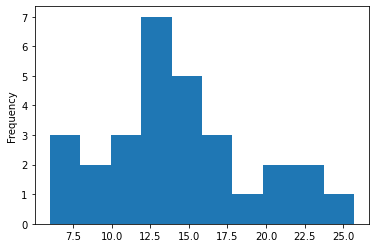

In [60]:
min1 = df['1min_bid_high'] - df['1min_bid_low']
min1.plot.hist()

### Distribution 5 Minute Opening Range

<AxesSubplot:ylabel='Frequency'>

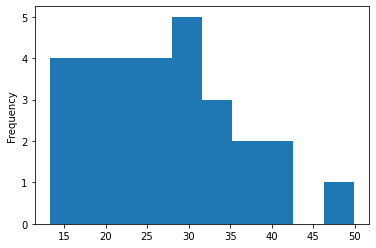

In [61]:
min5 = df['5min_bid_high'] - df['5min_bid_low']
min5.plot.hist()

### Distribution Spread

<AxesSubplot:ylabel='Frequency'>

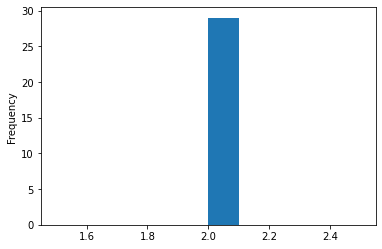

In [62]:
min5 = df['5min_ask_low'] - df['5min_bid_low']
min5.plot.hist()

1/3 5min range inside 1min
- How if my 5min opening range stop is outside reach of 1min range will be better is my theory 

In [63]:
df['5min1R'] = ((df['5min_bid_high'] - df['5min_bid_low']) -1) / 3

In [64]:
df['high_stop_lower'] = (df['5min_bid_high'] - df['5min1R']) < df['1min_bid_high']
df['high_stop_lower'].value_counts()

True     25
False     4
Name: high_stop_lower, dtype: int64

In [65]:
df['low_stop_higher'] = (df['5min_bid_low'] + df['5min1R']) > df['1min_bid_low']
df['low_stop_higher'].value_counts()

True     15
False    14
Name: low_stop_higher, dtype: int64